In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# for visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import holoviews as hv

# Testing
import scipy
import scipy.stats as st

# Modeling
import xgboost
from xgboost import XGBClassifier

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import model_selection
# Splitting Dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Scoring
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import KFold

# Class Imbalance
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# from imblearn import over_sampling

%matplotlib inline

In [4]:
print('Numpy Version : ' + np.__version__)
print('Pandas Version : ' + pd.__version__)
print('Matplotlib Version : ' + matplotlib.__version__)
print('Seaborn Version : ' + sns.__version__)
print('Scipy Version : ' + scipy.__version__)
print('Sklearn Version : ' + sklearn.__version__)
print('XGBoost Version : ' + xgboost.__version__)

Numpy Version : 1.18.5
Pandas Version : 1.1.4
Matplotlib Version : 3.3.3
Seaborn Version : 0.11.0
Scipy Version : 1.5.4
Sklearn Version : 0.23.2
XGBoost Version : 1.2.1


In [5]:
train = pd.read_csv('/home/hemanth/Downloads/archive/train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.shape

(381109, 12)

In [7]:
train[['id','Region_Code']].groupby('Region_Code', as_index=False).count().sort_values('id', ascending=False).head(10).Region_Code.to_list()

[28.0, 8.0, 46.0, 41.0, 15.0, 30.0, 29.0, 50.0, 3.0, 11.0]

In [8]:
train[train.Region_Code.isin(train[['id','Region_Code']].groupby('Region_Code', as_index=False).count().sort_values('id').head(10).Region_Code.to_list())]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
63,64,Male,58,1,19.0,1,1-2 Year,No,39661.0,26.0,141,0
83,84,Female,39,1,5.0,0,1-2 Year,Yes,31760.0,26.0,141,0
152,153,Male,51,1,19.0,0,1-2 Year,Yes,2630.0,124.0,228,0
154,155,Female,24,1,22.0,1,< 1 Year,No,34591.0,152.0,125,0
166,167,Female,28,1,44.0,0,1-2 Year,Yes,37570.0,156.0,258,1
...,...,...,...,...,...,...,...,...,...,...,...,...
380907,380908,Female,22,1,22.0,0,< 1 Year,Yes,38378.0,152.0,49,0
381026,381027,Male,36,1,34.0,0,1-2 Year,Yes,31408.0,124.0,32,1
381034,381035,Male,55,1,40.0,1,1-2 Year,No,27843.0,26.0,296,0
381053,381054,Female,25,1,1.0,1,< 1 Year,No,2630.0,152.0,148,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

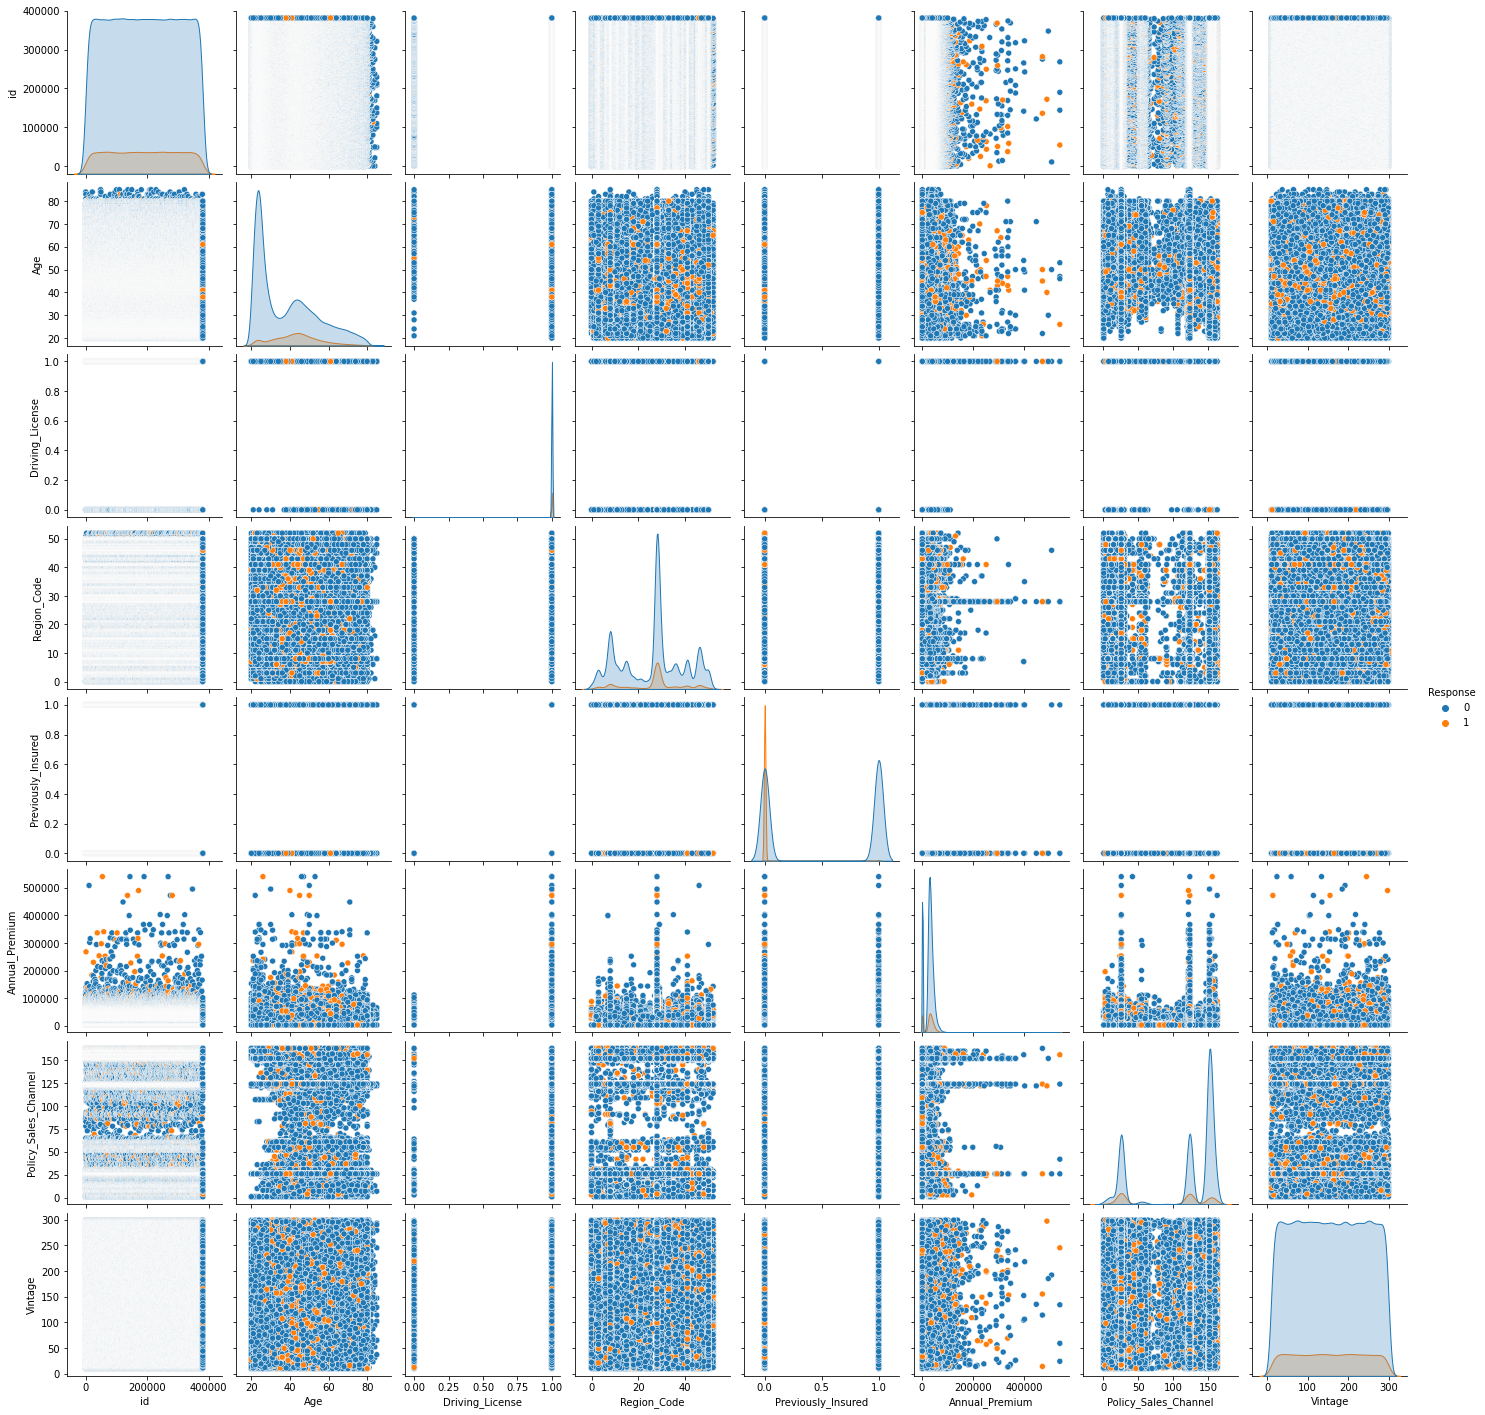

In [12]:
sns.pairplot(train,hue='Response')

In [13]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(train.select_dtypes(include=numerics).columns)
print(train.select_dtypes(include=numerics).shape)
data_num = train.select_dtypes(include=numerics)

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

(381109, 9)


In [14]:
#Invalid Value
display(train.select_dtypes(include=['object']).columns)
print(train.select_dtypes(include=object).shape)
data_cat = train.select_dtypes(include=['object'])

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

(381109, 3)


In [15]:
train[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [17]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [18]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [19]:
trainGroup = train.loc[:, train.columns.intersection(['id', 'Response'])]
trainGroup['Age-Group'] = train['Age'].apply(lambda x : '> 50' if x > 50 else ('36 - 50' if (x > 35) and (x < 51) else '20-35'))
trainGroup['Vintage-Group'] = train['Vintage'].apply(lambda x : '0-100' if x < 100 else ('100 - 200' if (x > 100) and (x < 200) else '200 - 300'))
trainGroup['Annual_Premium-Group'] = train['Annual_Premium'].apply(lambda x : '> 450K' if x > 450000 else ('150K - 450K' if (x > 150000) and (x < 450001) else '0 - 150K'))

trainGroup

,id,Response,Age-Group,Vintage-Group,Annual_Premium-Group
0,1,1,36 - 50,200 - 300,0 - 150K
1,2,0,> 50,100 - 200,0 - 150K
2,3,1,36 - 50,0-100,0 - 150K
3,4,0,20-35,200 - 300,0 - 150K
4,5,0,20-35,0-100,0 - 150K
...,...,...,...,...,...
381104,381105,0,> 50,0-100,0 - 150K
381105,381106,0,20-35,100 - 200,0 - 150K
381106,381107,0,20-35,100 - 200,0 - 150K
381107,381108,0,> 50,0-100,0 - 150K


#  Visualize Driving License

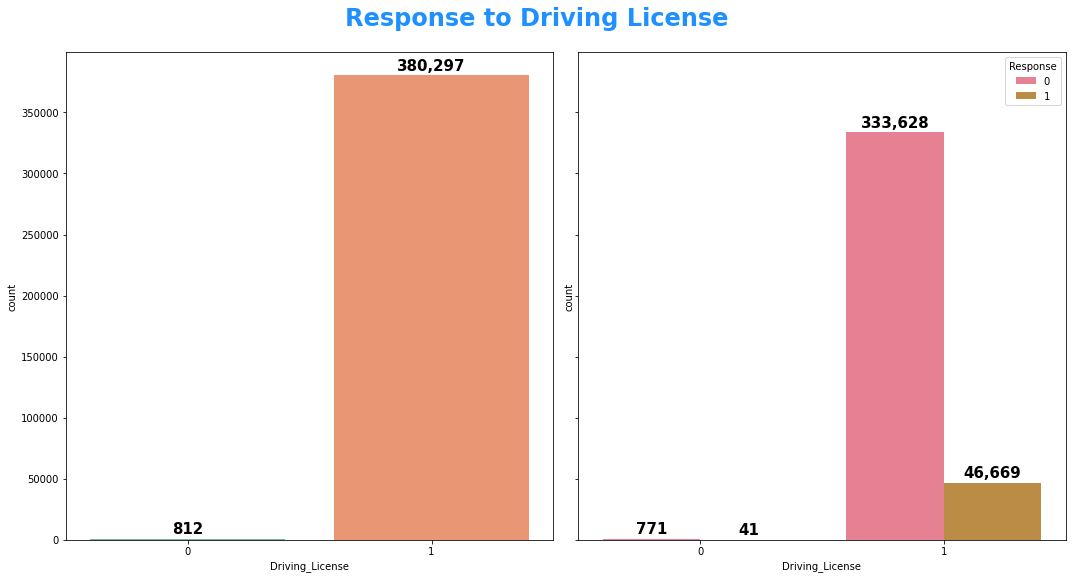

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)


# Count Length Data Vehicle Damage
dv_len = len(train['Driving_License'])

g = sns.countplot(train['Driving_License'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(train['Driving_License'], hue = train['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")

plt.suptitle('Response to Driving License',y=1, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout()


plt.savefig('./driving-license.jpg')
plt.show();


# Visualize Previously Insured

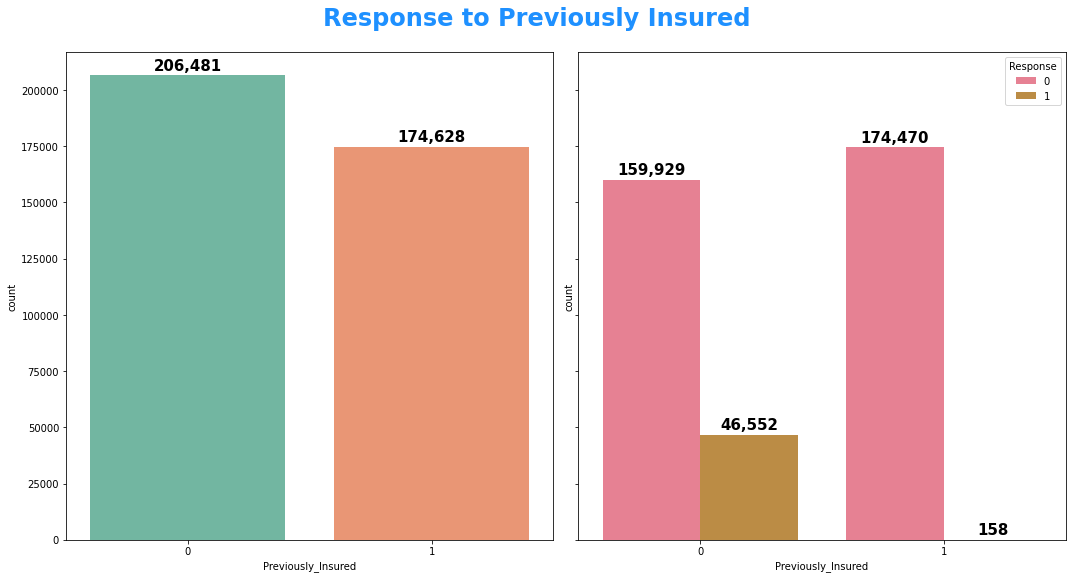

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

pi_len = len(train['Previously_Insured'])

g = sns.countplot(train['Previously_Insured'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(train['Previously_Insured'], hue = train['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")

plt.suptitle('Response to Previously Insured',y=1, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout()

plt.savefig('./previously-insured.jpg')
plt.show();

# Visualize Age

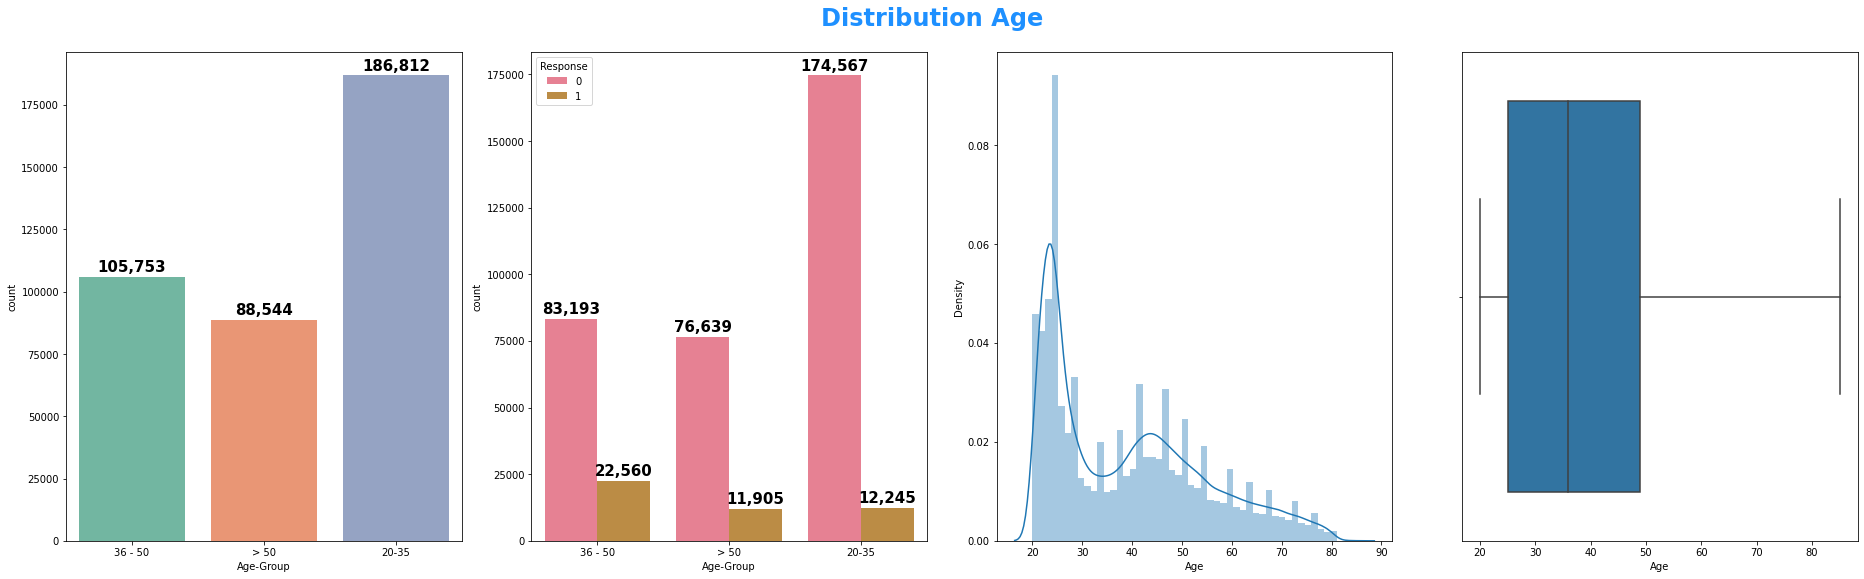

In [22]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

ag_len = len(trainGroup['Age-Group'])

g = sns.countplot(trainGroup['Age-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")

h = sns.countplot(trainGroup['Age-Group'], hue = trainGroup['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
ax[1].legend(loc="upper left", title="Response",)

    
k = sns.distplot(train['Age'], ax=ax[2])
l = sns.boxplot(train['Age'], orient='v', ax=ax[3])

plt.suptitle('Distribution Age',y=1, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout()

plt.savefig('./age.jpg')
plt.show();


# Visualize Vintage

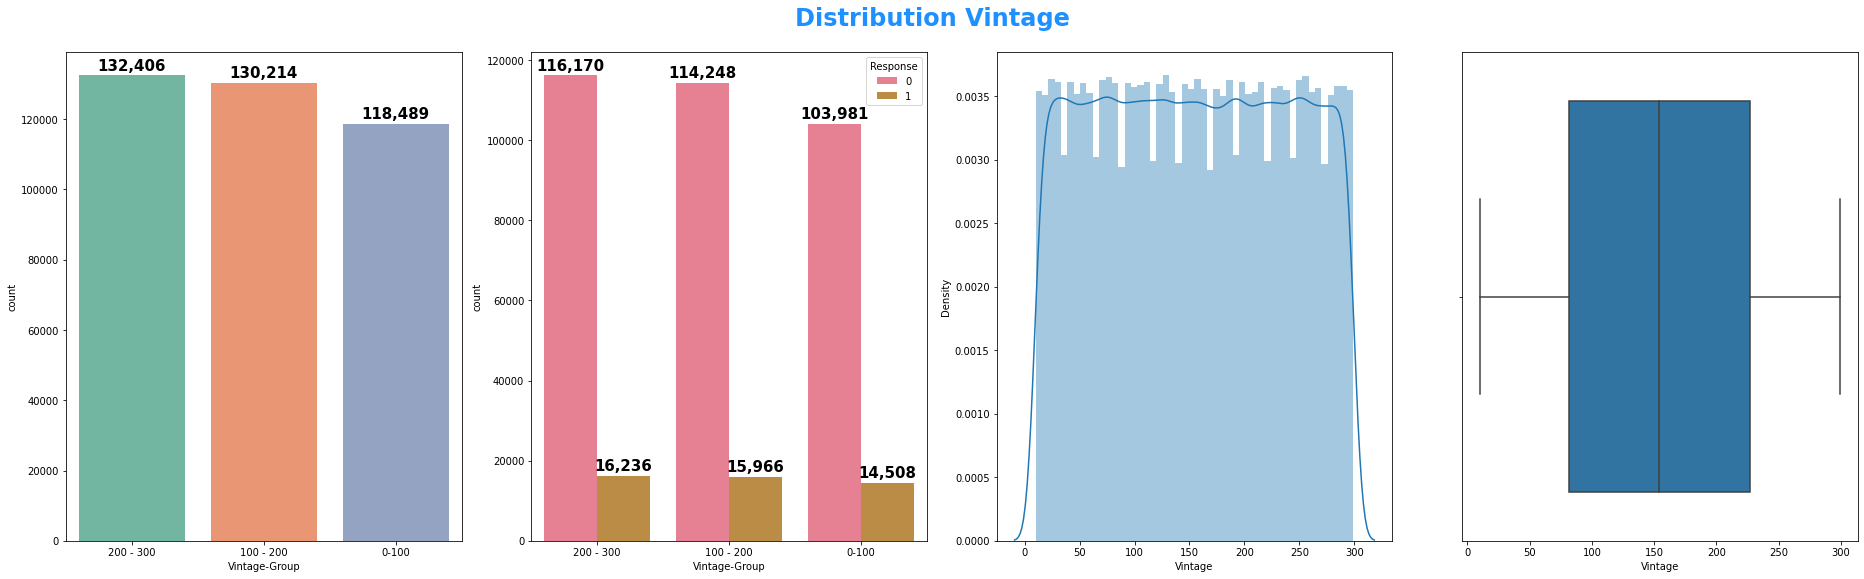

In [23]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

vg_len = len(trainGroup['Vintage-Group'])

g = sns.countplot(trainGroup['Vintage-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(trainGroup['Vintage-Group'], hue = trainGroup['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
g = sns.distplot(train['Vintage'], ax=ax[2])
g = sns.boxplot(train['Vintage'], orient='v', ax=ax[3])

plt.suptitle('Distribution Vintage',y=1, fontsize=24,color='dodgerblue',fontweight='bold');
	
fig.tight_layout()

plt.savefig('./vintage.jpg')
plt.show();

# Visualize Annual Premium

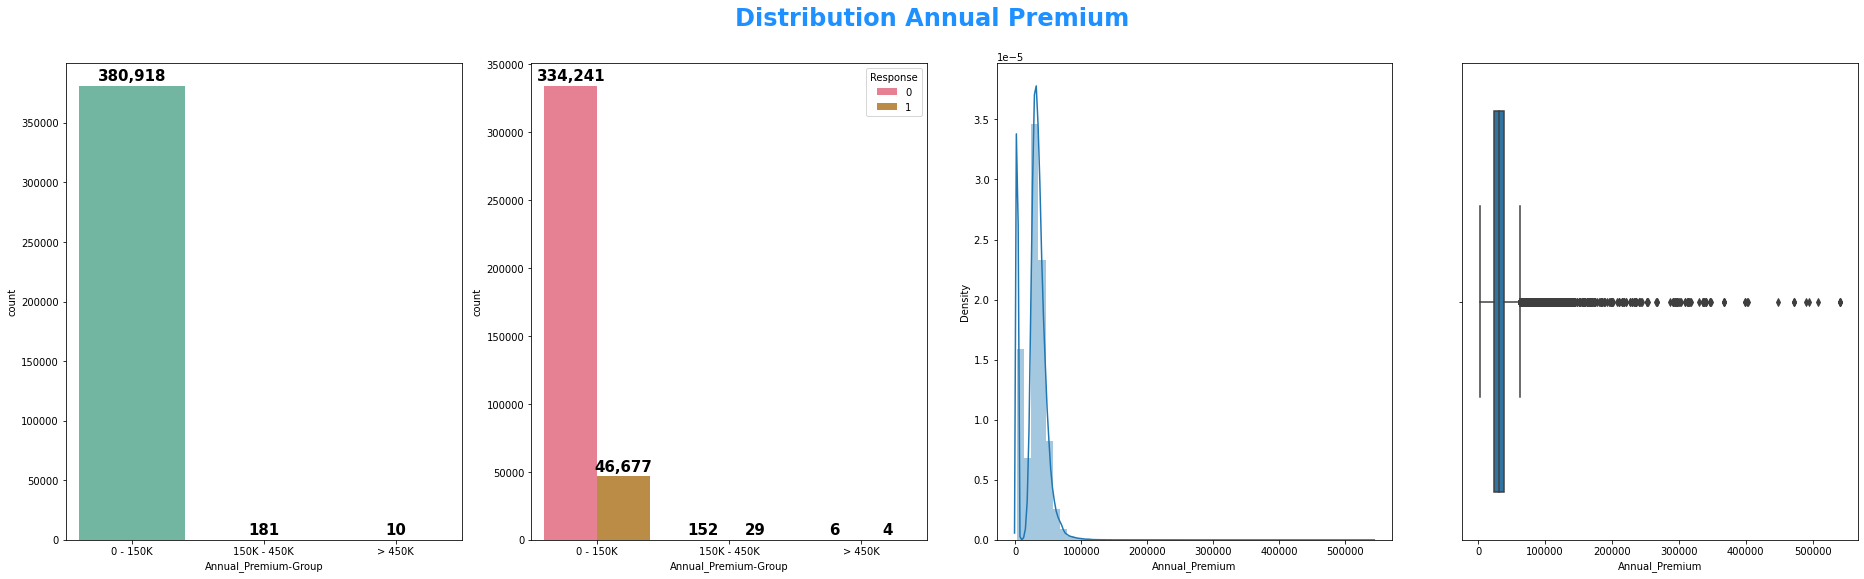

In [24]:
fig,ax = plt.subplots(1,4,figsize=(26,8))

apg_len = len(trainGroup['Annual_Premium-Group'])

g = sns.countplot(trainGroup['Annual_Premium-Group'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(trainGroup['Annual_Premium-Group'], hue = trainGroup['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
g = sns.distplot(train['Annual_Premium'], ax=ax[2])
g = sns.boxplot(train['Annual_Premium'], orient='v', ax=ax[3])

plt.suptitle('Distribution Annual Premium',y=1, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout()

plt.savefig('./annual-premium.jpg')
plt.show();


# Visualize Region Code

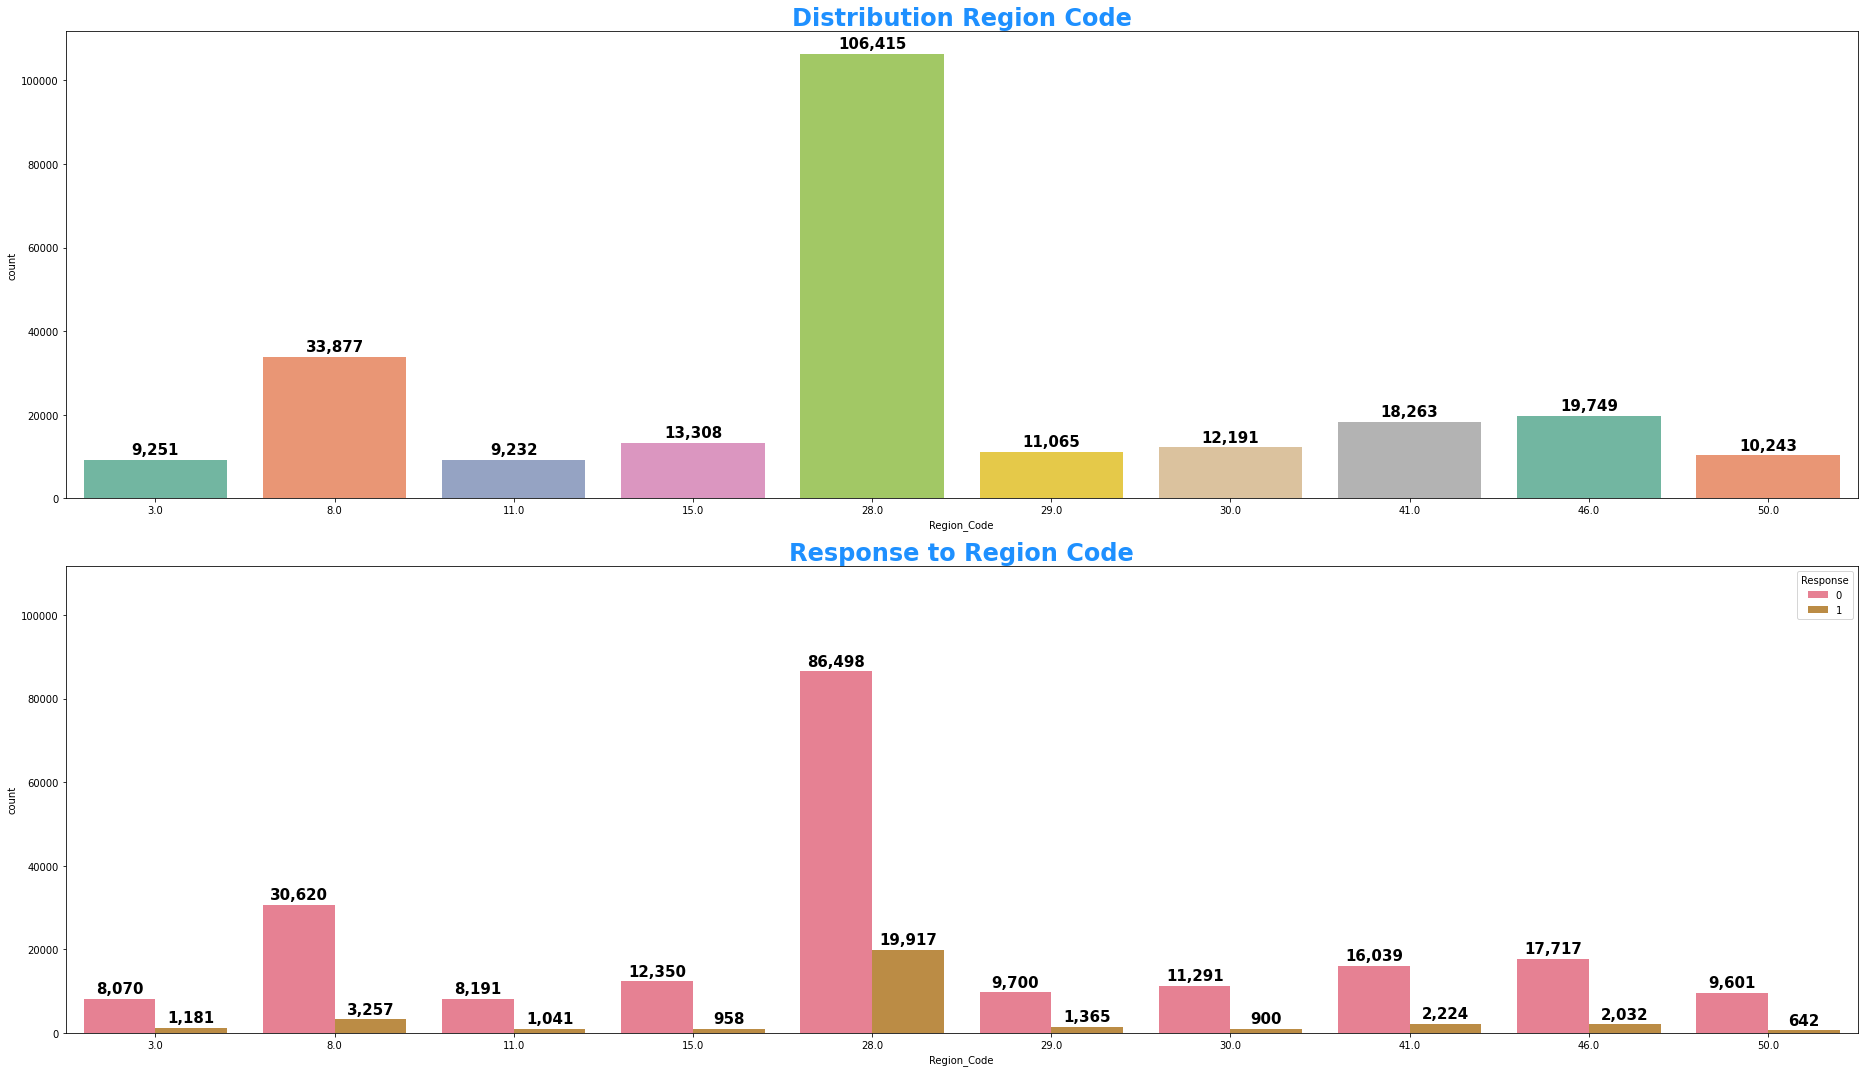

In [25]:
fig,ax = plt.subplots(2,figsize=(26,15),
                     sharey=True)

data_region_code = train[train.Region_Code.isin(train[['id','Region_Code']].groupby('Region_Code', as_index=False).count().sort_values('id', ascending=False).head(10).Region_Code.to_list())]

g = sns.countplot(data_region_code['Region_Code'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
ax[0].set_title('Distribution Region Code',fontsize=24,color='dodgerblue',fontweight='bold')

h = sns.countplot(data_region_code['Region_Code'],hue= data_region_code['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
ax[1].set_title('Response to Region Code',fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout();

# Visualize Gender

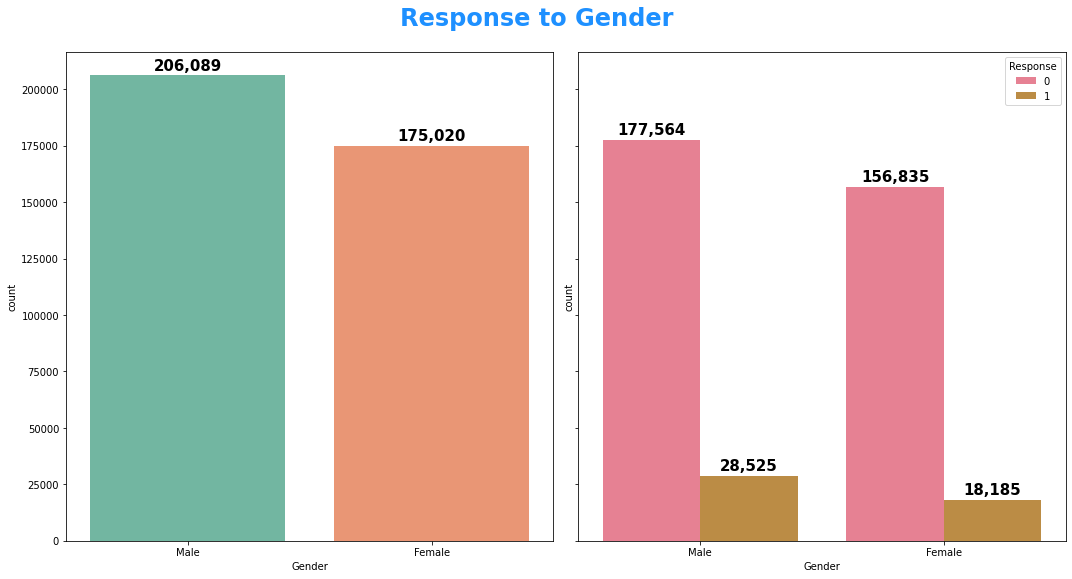

In [26]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

g_len = len(train['Gender'])

g = sns.countplot(train['Gender'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(train['Gender'], hue = train['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
plt.suptitle('Response to Gender',y=1, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout()

plt.savefig('./gender.jpg')
plt.show();



# Visualize Vehicle Age

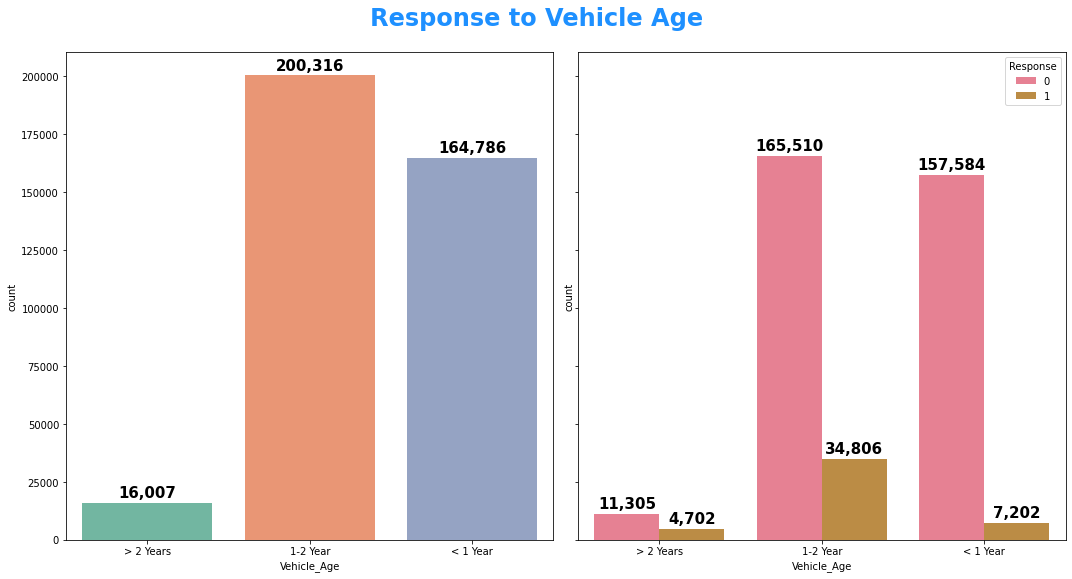

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

va_len = len(train['Vehicle_Age'])

g = sns.countplot(train['Vehicle_Age'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")
    
h = sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")


plt.suptitle('Response to Vehicle Age',y=1, fontsize=24,color='dodgerblue',fontweight='bold');

fig.tight_layout()

plt.savefig('./vehicle-age.jpg')
plt.show();



# Visualize Vehicle Damage

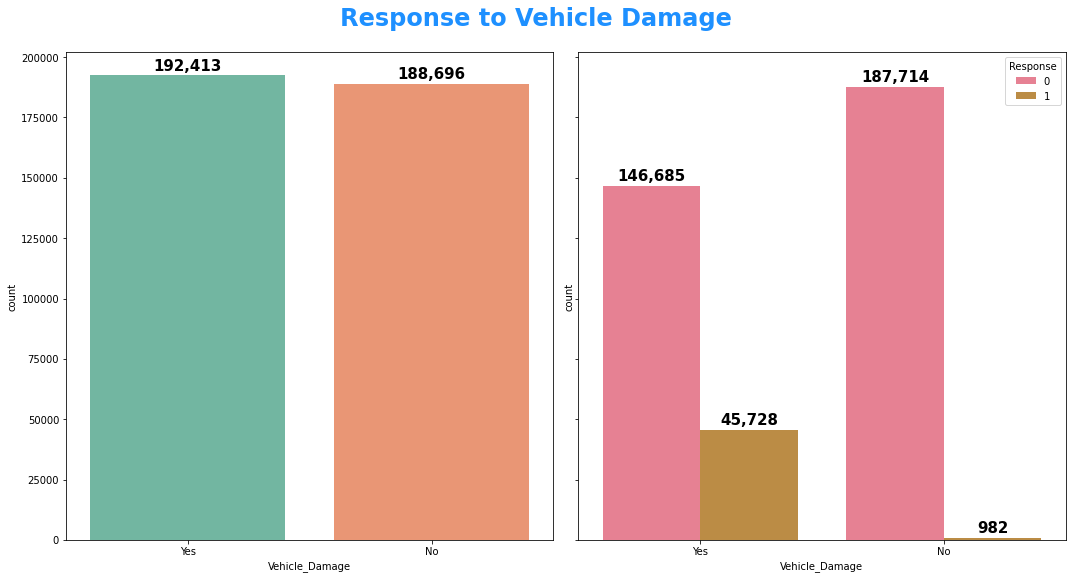

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,8),
                     sharey=True)

# Count Length Data Vehicle Damage
vd_len = len(train['Vehicle_Damage'])

g = sns.countplot(train['Vehicle_Damage'],palette=sns.color_palette("Set2"), ax=ax[0])
for i in g.patches:
    g.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")



h = sns.countplot(train['Vehicle_Damage'], hue = train['Response'],palette=sns.color_palette("husl", 8), ax=ax[1])
for i in h.patches:
    h.annotate(format(i.get_height(), ',.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', 
                va = 'center', 
                size=15,
                xytext = (0, 10), 
                textcoords = 'offset points',
                color='black',
                fontsize="15",
                fontweight="bold")

plt.suptitle('Response to Vehicle Damage',y=1, fontsize=24,color='dodgerblue',fontweight='bold')

fig.tight_layout()

plt.savefig('./vehicle-damage.jpg')
plt.show();


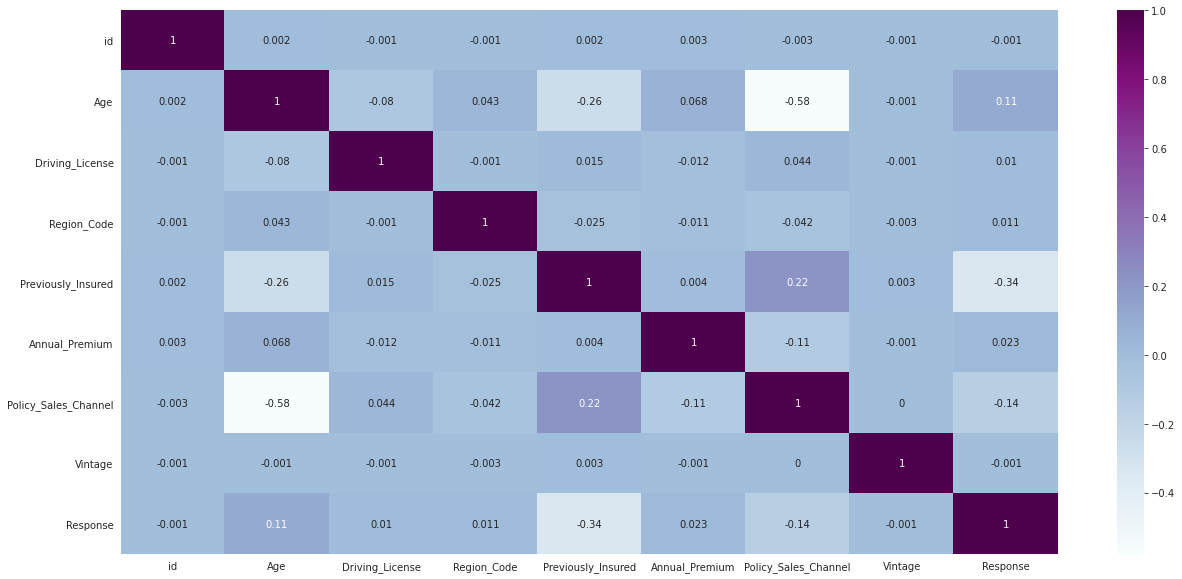

In [29]:
corr_= train.corr().round(3)
mask = np.zeros_like(corr_)
    
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(21, 10))
    ax = sns.heatmap(corr_, annot=True, cmap = "BuPu")

plt.tight_layout;

In [30]:
# Finding Missing Value
data_missing_value = train.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value = data_missing_value[data_missing_value['missing_value'] > 0]

data_missing_value

,feature,missing_value


In [31]:
train.duplicated().sum()

0

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()

ss_list = [
    'Annual_Premium',
    'Vintage',
]

for x in ss_list :
    train[[x]] = ss.fit_transform(train[[x]])

In [33]:
gd = {'Male' : 0, 'Female' : 1}
pi = {0 : 'No', 1 : 'Yes'}
train['Gender'] = train['Gender'].map(gd)
train['Previously_Insured'] = train['Previously_Insured'].map(pi)
train



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,No,> 2 Years,Yes,0.574539,26.0,0.748795,1
1,2,0,76,1,3.0,No,1-2 Year,No,0.172636,26.0,0.342443,0
2,3,0,47,1,28.0,No,> 2 Years,Yes,0.449053,26.0,-1.521998,1
3,4,0,21,1,11.0,Yes,< 1 Year,No,-0.113018,152.0,0.581474,0
4,5,1,29,1,41.0,Yes,< 1 Year,No,-0.178259,152.0,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,1,26.0,Yes,1-2 Year,No,-0.022912,26.0,-0.792954,0
381105,381106,0,30,1,37.0,Yes,< 1 Year,No,0.549093,152.0,-0.279037,0
381106,381107,0,21,1,30.0,Yes,< 1 Year,No,0.264543,160.0,0.079509,0
381107,381108,1,68,1,14.0,No,> 2 Years,Yes,0.816389,124.0,-0.960275,0


In [34]:
#one hot encoading
train_dummies = pd.get_dummies(train[[
    'Vehicle_Damage',
    'Previously_Insured',    
    'Vehicle_Age'
]])
# , drop_first=True
train_d = pd.concat([train, train_dummies], axis=1)
train_d.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_No,Vehicle_Damage_Yes,Previously_Insured_No,Previously_Insured_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,0,44,1,28.0,No,> 2 Years,Yes,0.574539,26.0,0.748795,1,0,1,1,0,0,0,1
1,2,0,76,1,3.0,No,1-2 Year,No,0.172636,26.0,0.342443,0,1,0,1,0,1,0,0
2,3,0,47,1,28.0,No,> 2 Years,Yes,0.449053,26.0,-1.521998,1,0,1,1,0,0,0,1
3,4,0,21,1,11.0,Yes,< 1 Year,No,-0.113018,152.0,0.581474,0,1,0,0,1,0,1,0
4,5,1,29,1,41.0,Yes,< 1 Year,No,-0.178259,152.0,-1.378580,0,1,0,0,1,0,1,0


In [35]:
train_d=train_d.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})

train_d['Vehicle_Age_lt_1_Year']=train_d['Vehicle_Age_lt_1_Year'].astype('int')
train_d['Vehicle_Age_gt_2_Years']=train_d['Vehicle_Age_gt_2_Years'].astype('int')
train_d['Vehicle_Damage_Yes']=train_d['Vehicle_Damage_Yes'].astype('int')

In [36]:
train_d = train_d.drop([
    'id', 
    'Vehicle_Age',
    'Vehicle_Damage',
    'Previously_Insured',
    
    'Vehicle_Damage_No',    
    'Vehicle_Age_1-2 Year'
    
], axis=1)
train_d.head()

,Gender,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_Yes,Previously_Insured_No,Previously_Insured_Yes,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years
0,0,44,1,28.0,0.574539,26.0,0.748795,1,1,1,0,0,1
1,0,76,1,3.0,0.172636,26.0,0.342443,0,0,1,0,0,0
2,0,47,1,28.0,0.449053,26.0,-1.521998,1,1,1,0,0,1
3,0,21,1,11.0,-0.113018,152.0,0.581474,0,0,0,1,1,0
4,1,29,1,41.0,-0.178259,152.0,-1.378580,0,0,0,1,1,0


In [37]:
train_pp = train_d

y = train_pp['Response'].values
X = train_pp.drop(labels = ['Response'], axis = 1)
print("Shape of X is {} and that of y is {}".format(X.shape, y.shape))

# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Shape of training set ', X_train.shape)
print('Shape of test set ', X_test.shape)


Shape of X is (381109, 12) and that of y is (381109,)
Shape of training set  (304887, 12)
Shape of test set  (76222, 12)


In [38]:
classifications = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(max_depth= 2, eta= 1, objective= 'binary:logistic')
]

result_model = pd.DataFrame(columns = ['Method', 'roc_auc_score'])
result_model

,Method,roc_auc_score


In [39]:
for model in classifications:
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:,1]
    
    method = str(type(model)).split('.')[-1][:-2]
    
    #roc_auc_score
    roc_auc_score_ = roc_auc_score(y_test, y_score)
    roc_auc_score_ = roc_auc_score_.item()
    
    result_model = result_model.append({
        'Method': method,
        'roc_auc_score': roc_auc_score_,
    },ignore_index=True)
    
result_model


,Method,roc_auc_score
0,LogisticRegression,0.837746
1,DecisionTreeClassifier,0.599110
2,RandomForestClassifier,0.835008
3,XGBClassifier,0.859764


In [40]:
rf = XGBClassifier(max_depth= 2, eta= 1, objective= 'binary:logistic')
rf.fit(X_train, y_train)

kfold = model_selection.KFold(n_splits=10, random_state=41)

# Get score:
results_k = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring='roc_auc')
results_k


array([0.85906017, 0.8572119 , 0.85713662, 0.85853623, 0.85360742,
       0.85953761, 0.85830285, 0.85669391, 0.85950557, 0.8525088 ])

In [41]:
from sklearn.model_selection import StratifiedKFold

roc_auc_list = []
roc_auc_holdout = []
roc_auc_train = []
folds = []
model = XGBClassifier(max_depth= 2, eta= 1, objective= 'binary:logistic')
kfold = KFold(n_splits=10, random_state=41)
for i, (train_index, test_index) in enumerate(kfold.split(X_train)):
    X1_train, X1_valid = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_valid = y[train_index], y[test_index]
    model.fit(X1_train, y1_train)
    train_pred = model.predict_proba(X1_train)[:,1] # 70%
    #Measure of the fit of your model.
    pred = model.predict_proba(X1_valid)[:,1] # 10%
    # DATA WHICH MODEL HAS NOT SEEN
    pred_holdout = model.predict_proba(X_test)[:,1] # 20%
    
    print('Prediction length on validation set, XGBoost Classifier, fold ', i, ': ', len(pred))

    folds.append(i)
    roc_auc_list.append(roc_auc_score(y1_valid, pred))
    roc_auc_holdout.append(roc_auc_score(y_test, pred_holdout))
    roc_auc_train.append(roc_auc_score(y1_train, train_pred))


Prediction length on validation set, XGBoost Classifier, fold  0 :  30489
Prediction length on validation set, XGBoost Classifier, fold  1 :  30489
Prediction length on validation set, XGBoost Classifier, fold  2 :  30489
Prediction length on validation set, XGBoost Classifier, fold  3 :  30489
Prediction length on validation set, XGBoost Classifier, fold  4 :  30489
Prediction length on validation set, XGBoost Classifier, fold  5 :  30489
Prediction length on validation set, XGBoost Classifier, fold  6 :  30489
Prediction length on validation set, XGBoost Classifier, fold  7 :  30488
Prediction length on validation set, XGBoost Classifier, fold  8 :  30488
Prediction length on validation set, XGBoost Classifier, fold  9 :  30488


In [42]:
roc_auc_train # train

[0.8610131086452595,
 0.8610533898784847,
 0.8610707126092711,
 0.8612291186938564,
 0.8608529946198872,
 0.8617686110371519,
 0.8610973064062211,
 0.8609106424497504,
 0.8615537509937428,
 0.861213179355505]

In [43]:
roc_auc_holdout # test

[0.8618582317758428,
 0.8619268124786174,
 0.8618831404211031,
 0.8619404357535365,
 0.8615186899654566,
 0.8614609132279762,
 0.8614200246999822,
 0.8619001619927984,
 0.8619246957601421,
 0.8619680832031859]

In [44]:
roc_auc_list # val

[0.8578246526345299,
 0.85799970366838,
 0.8567715759803395,
 0.8572151391410491,
 0.8585646359022545,
 0.8528915477628346,
 0.85687899499884,
 0.8592646041864254,
 0.8546380674808437,
 0.8564049303367748]

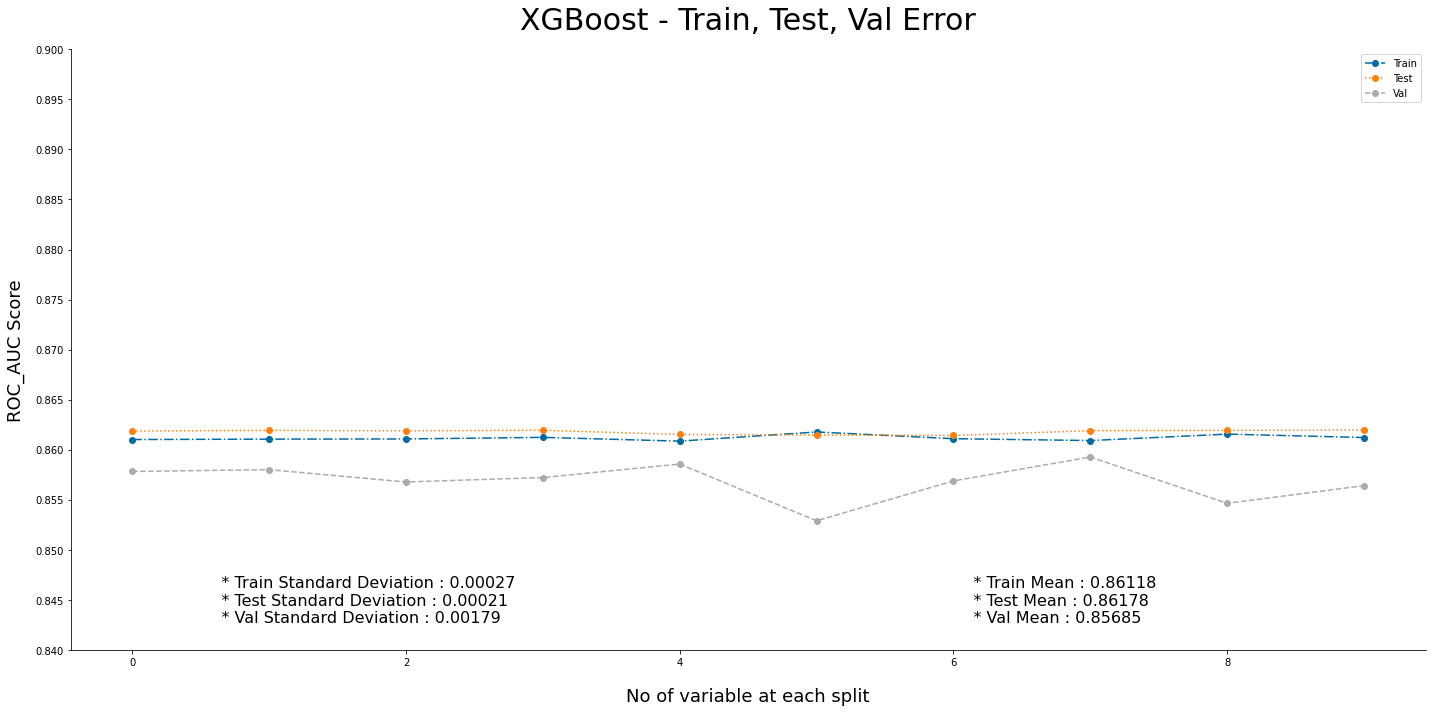

In [45]:
rg = np.arange(0.840,0.900,0.005)

train_mean = np.mean(roc_auc_train)
test_mean = np.mean(roc_auc_holdout)
val_mean = np.mean(roc_auc_list)

train_std = np.std(roc_auc_train)
test_std = np.std(roc_auc_holdout)
val_std = np.std(roc_auc_list)

plt.style.use('tableau-colorblind10')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(roc_auc_train, label='Train', marker='o', linestyle='-.')
ax.plot(roc_auc_holdout, label='Test', marker='o', linestyle=':')
ax.plot(roc_auc_list, label='Val', marker='o', linestyle='--')

text_m = '''
    * Train Mean : ''' + str(format(train_mean, '.5f')) + '''
    * Test Mean : ''' + str(format(test_mean, '.5f')) + ''' 
    * Val Mean : ''' + str(format(val_mean, '.5f')) + '''     
'''

ax.text(6,0.841,text_m,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


text_s = '''
    * Train Standard Deviation : ''' + str(format(train_std, '.5f')) + '''
    * Test Standard Deviation : ''' + str(format(test_std, '.5f')) + ''' 
    * Val Standard Deviation : ''' + str(format(val_std, '.5f')) + '''     
'''

ax.text(0.5,0.841,text_s,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')


ax.set_xlabel('No of variable at each split', fontsize=18, labelpad=20)
ax.set_ylabel('ROC_AUC Score', fontsize=18, labelpad=10)

ax.set_title('XGBoost - Train, Test, Val Error', pad=20, fontsize=30)

ax.legend()
ax.set_yticks(rg)

sns.despine()

plt.savefig('./xgb-ttv.jpg')

plt.tight_layout()

plt.show();

# Feature Importance

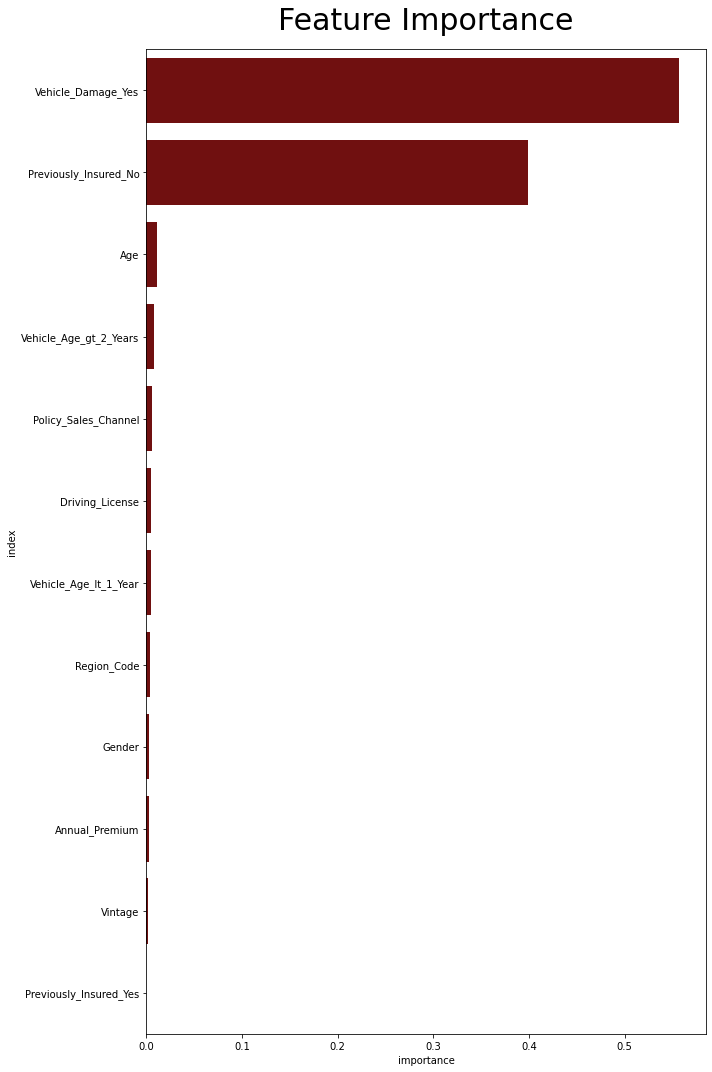

In [46]:
#
clf = XGBClassifier()
clf.fit(X_train, y_train)

#
clf.feature_importances_

#
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index());

plt.title('Feature Importance', fontsize=30, pad=20)


plt.savefig('./feature-importance.jpg')
plt.tight_layout()
plt.show();